In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%pylab inline

plt.rcParams["figure.figsize"] = (10,7)

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
class LinearRegresion:
    def __init__(self, lr=0.01):
        self.lr = lr 
        self.w = 0
    
    def fit(self, X, y, epochs=10):
        self.w = np.zeros(X.shape[1])
        n = X.shape[0]
        
        for ep in range(epochs):    
            grad = 2 / n * X.T @ (np.dot(X, self.w) - y)
            self.w = self.w - self.lr * grad
    
    def predict(self, X):
        return X @ self.w

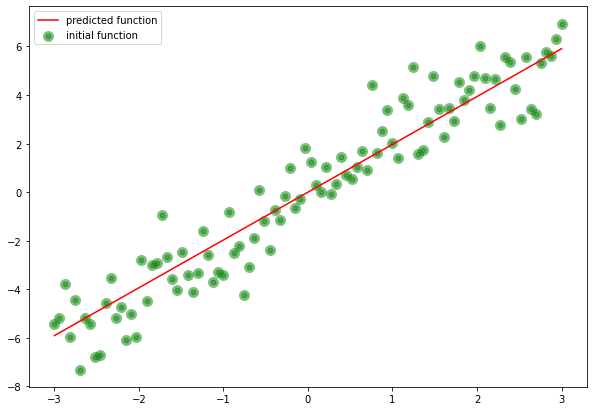

In [3]:
X = np.linspace(-3, 3, 100)
y = (2 * X + np.random.normal(0, 1, size=X.shape[0])).flatten()

linreg = LinearRegresion()
linreg.fit(X[:, None], y, 50)

plt.scatter(X.flatten(), y, label='initial function', c = 'g',linewidths=5, alpha=0.5)
plt.plot(X.flatten(), X[:, None] @ linreg.w, 'r-', label='predicted function')
plt.legend()

In [4]:
#get data
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv

/bin/bash: wget: command not found
/bin/bash: wget: command not found


In [5]:
# выгружаю с локального файла, так как предварительно wget не установила
df = pd.read_csv('house_prices_train.csv')
df.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [6]:
num_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
                'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
                'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
                'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                'MiscVal', 'MoSold', 'YrSold']

target = 'SalePrice'

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[num_features])
y = df[target].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(np.hstack((X, np.ones((X.shape[0], 1)))), y, test_size=0.2, random_state=142)

In [9]:
X_train

array([[-0.87256276,  0.36109505, -0.12024921, ..., -1.22911075,
        -0.61443862,  1.        ],
       [ 3.14767255, -0.09311018,  0.03639783, ...,  0.620891  ,
         0.13877749,  1.        ],
       [ 1.49228154, -1.22862327, -0.73511137, ..., -0.48911005,
         0.13877749,  1.        ],
       ...,
       [ 3.14767255,  1.36034657,  2.4186755 , ..., -1.96911145,
        -1.36765473,  1.        ],
       [-0.87256276, -0.68357699, -0.22718611, ...,  0.620891  ,
         0.13877749,  1.        ],
       [-0.87256276,  3.17716752,  0.86403136, ..., -0.1191097 ,
         1.64520971,  1.        ]])

In [10]:
df.shape

(1460, 81)

In [11]:
def rmse(y_true, y_preds):
    n = len(y_true)
    return np.sqrt(np.sum((y_true - y_preds) ** 2) / n)

In [12]:
from scipy.stats import ncf, f

def calculate_significance(y_true, y_preds, coefs_num):
    
    ss_reg = ((y_true - y_preds) ** 2).sum(axis=0)
    ss_mean = ((y_true - np.average(y_true, axis=0)) ** 2).sum(axis=0)
    r_squared = (ss_mean - ss_reg) / ss_mean
    adj_r_squared = 1 - (len(y_true) - 1)/(len(y_true)- coefs_num - 1)*(1-r_squared)

    numerator = (ss_mean - ss_reg)/(coefs_num + 1 - 1)
    denumerator = ss_mean/(len(y_true) - coefs_num - 1)
    F = numerator / denumerator

    df1 = (coefs_num + 1 - 1)
    df2 = (len(y_true) - coefs_num - 1)
    p_value = 1 - f.cdf(F, df1, df2)

    return {'p-value': p_value, 'F stat': F, 'r_squared': r_squared, 'adj_r_squared': adj_r_squared}

In [24]:
results = dict()
for i, num_feature in enumerate(num_features):
    lin_reg = LinearRegresion()
    lin_reg.fit(X_train[:, [i, -1]], y_train, epochs=50)
    pred = lin_reg.predict(X_train[:, [i, -1]])
    results[num_feature] = calculate_significance(y_train, pred, lin_reg.w.shape[0])


In [25]:
p_value_top = sorted(results, key=lambda x: results[x]['p-value'])[::-1]
print(p_value_top[:5])
f_stat_top = sorted(results, key=lambda x: results[x]['F stat'])[::-1]
print(f_stat_top[:5])
r_squared_top = sorted(results, key=lambda x: results[x]['r_squared'])[::-1]
print(r_squared_top[:5])
adj_r_squared_top = sorted(results, key=lambda x: results[x]['adj_r_squared'])[::-1]
print(adj_r_squared_top[:5])

['YrSold', 'MoSold', 'MiscVal', 'PoolArea', 'ScreenPorch']
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF']
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF']
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF']


In [26]:
f_stat_top = sorted(results, key=lambda x: results[x]['F stat'])[::-1]
print(f_stat_top[:5])
itop5_feature = [i for i, name in enumerate(num_features) if name in f_stat_top[:5]]
print('TOP 5:', itop5_feature)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF']
TOP 5: [3, 8, 11, 21, 22]


In [27]:
lin_reg = LinearRegresion()
lin_reg.fit(X_test, y_test, epochs=500)
pred = lin_reg.predict(X_test)
print('RMSE on test for all features:', rmse(y_test, pred))

RMSE on test for all features: 25204.46594640573


In [28]:
lin_reg = LinearRegresion()
lin_reg.fit(X_test[:, itop5_feature+[-1]], y_test, epochs=500)
predict = lin_reg.predict(X_test[:,itop5_feature+[-1]])
print('RMSE on test for top5_feature:', rmse(y_test, predict))

RMSE on test for top5_feature: 31638.14853758224


Таким образом, ТОП 5 фичей: OverallQual, GrLivArea, GarageCars, GarageArea, 1stFlrSF

На тестовой выборке ошибка упала не так много, поэтому можно считать, что признаки корректны